In [14]:
# %load defaults.ipy
# %load defaults.ipy
from numpy import *
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 200
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4
from IPython.core.display import display, HTML
import matplotlib2tikz
import PIL



def writeMetadata(filename, data):
    im = PIL.Image.open(filename)
    
    meta = PIL.PngImagePlugin.PngInfo()

    for key in data.keys():
        meta.add_text(key, data[key])
    im.save(filename, "png", pnginfo=meta)
    
def showAndSave(name):
    fig = plt.gcf()
    ax = plt.gca()
    ax.text(0.95, 0.01, 'By Kjetil Olsen Lye\nkjetil.o.lye@gmail.com',
         fontsize=3, color='gray',
         ha='right', va='bottom', alpha=0.5, transform=ax.transAxes)

    matplotlib2tikz.save(name + '.tikz',
           figureheight = '\\figureheight',
           figurewidth = '\\figurewidth')
    
    savenamepng = name + '.png'
    plt.savefig(savenamepng)
    
    writeMetadata(savenamepng, {'Copyright' : 'Copyright, Kjetil Olsen Lye kjetil.o.lye@gmail.com'
                               })
    plt.show()

In [2]:
import sys
sys.path.append("/home/kjetil/projects/alsvinn/build/python/")

import alsvinn

In [15]:
import re
def computeConvergence(basename, showSingle=False):
    name = re.search(r'brownian_(.+)\/', basename).group(1)
    print(basename)
    name = name.replace("_", " ").title()
    
    N = 128
    display(HTML("<h1>%s</h1>" % name))
    try:
        r = alsvinn.run(name='test', base_xml=basename, dimension=[N,1,1], uq=True, samples=4096)
    except Exception as e:
        print("%s failed, see error message below: " % name)
        print (e)
        return
    Ms = 2**array(range(3,13))
    
    for t in [0,1]:
        plt.figure(t)
        for M in Ms:
            mean = zeros((N))
            for k in range(M):
                mean += r.get_data('u', timestep=t, sample=k)
            mean /= M
            
            if M > Ms[0]:
                errors.append(sqrt(sum(abs(mean-meanPrev)**2)/mean.shape[0]))
            meanPrev = mean
            if showSingle:
                x = linspace(0,1,N)
                plt.plot(x,u)
                plt.xlabel('$u(x,%d)$' % t)
                plt.ylabel('$x$')
                plt.title('$M=%d$' % M)
                plt.show()
        plt.loglog(Ms[:-1], errors, '-o',label=name)
        poly = polyfit(log(Ms[1:]), log(errors), 1)
        
        plt.loglog(Ms, exp(poly[1])*Ms**poly[0], '--', label='$O(M^{%.3f})$' % poly[0])
        plt.xlabel("M")
        plt.ylabel("Error")
        
        if not showSingle:
            plt.title("Cauchy convergence at $T=%d$ (normalized time)" % t)
        plt.legend()
        if showSingle:
            
            plt.title("Cauchy Convergence for %s at $T=%d$ (normalized time)" % (name,t))
            plt.show()
    
    for t in [0,1]:
        plt.figure(2+t)
        referenceSolution = zeros((N))
        for k in range(Ms[-1]):
            referenceSolution += r.get_data('u', timestep=t, sample=k)
        for M in Ms[:-1]:
            mean = zeros((N))
            for k in range(M):
                mean += r.get_data('u', timestep=t, sample=k)
            mean /= M
            
            
            errors.append(sqrt(sum(abs(mean-referenceSolution)**2)/mean.shape[0]))
           
        plt.loglog(Ms[:-1], errors, '-o',label=name)
        poly = polyfit(log(Ms[1:]), log(errors), 1)
        
        plt.loglog(Ms, exp(poly[1])*Ms**poly[0], '--', label='$O(M^{%.3f})$' % poly[0])
        plt.xlabel("M")
        plt.ylabel("Error")
        if not showSingle:
            plt.title("Convergence against reference solution\n$T=%d$ (normalized time)" % t)
        
        plt.legend()
        if showSingle:
            plt.title("Convergence for %s at $T=%d$ (normalized time)\nagainst reference solution" % (name,t))
            plt.show()

../configs/brownian_niederreiter2/brownian.xml
../configs/brownian_latin_random/brownian.xml


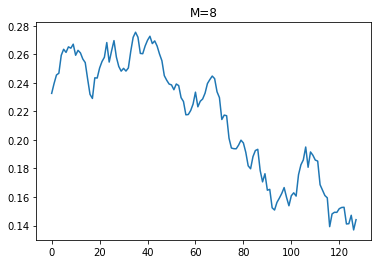

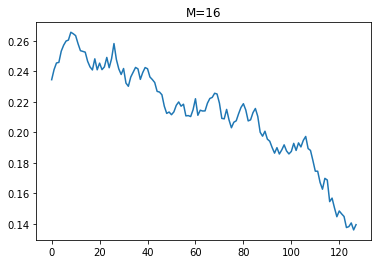

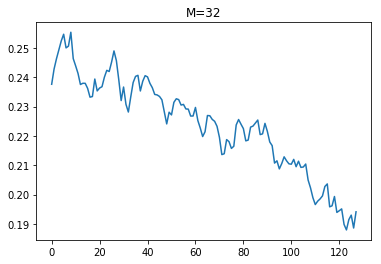

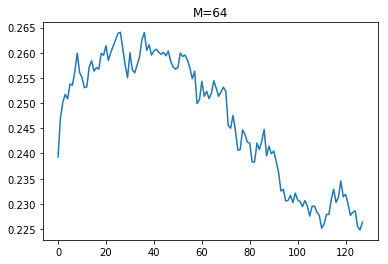

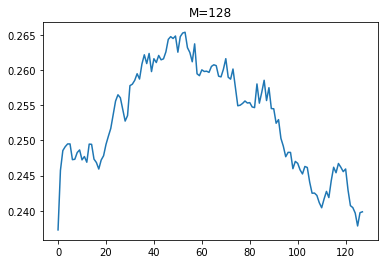

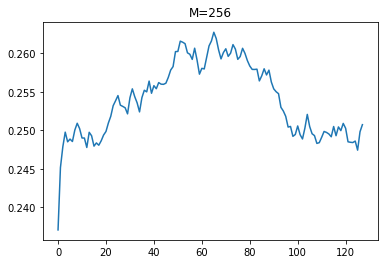

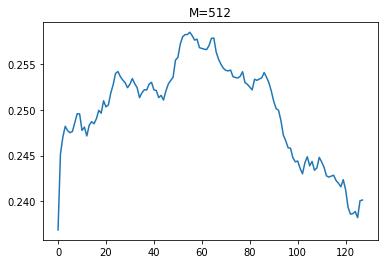

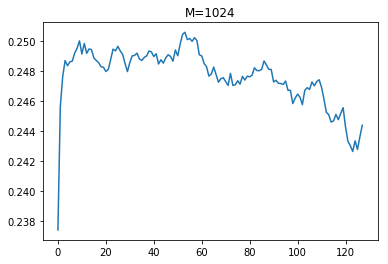

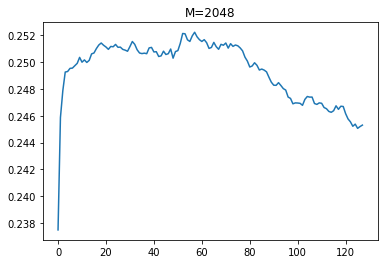

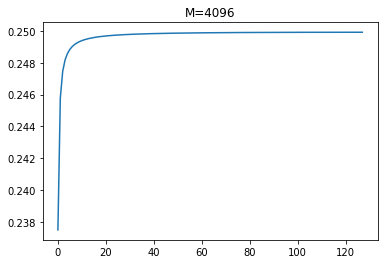

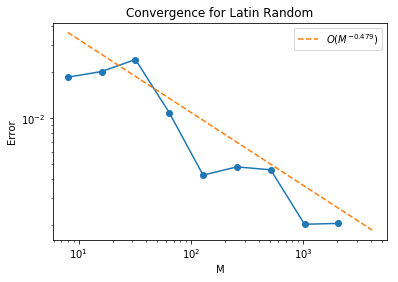

../configs/brownian_faure/brownian.xml


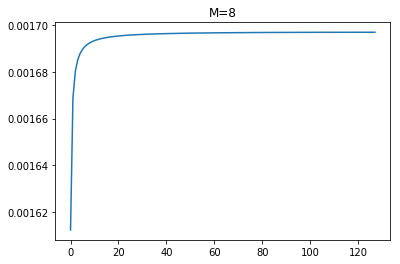

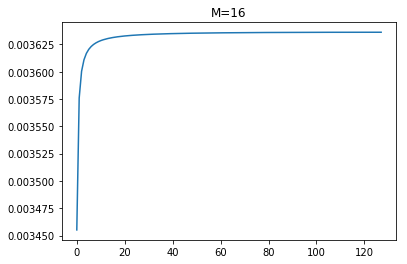

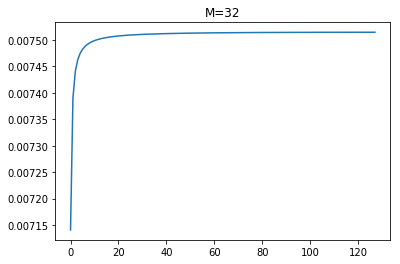

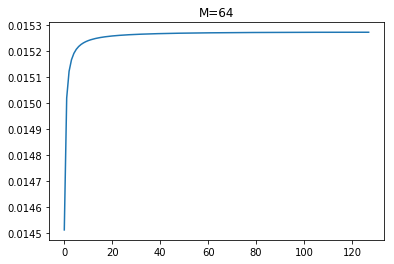

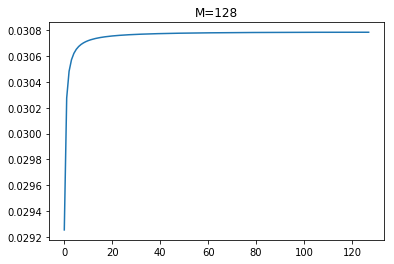

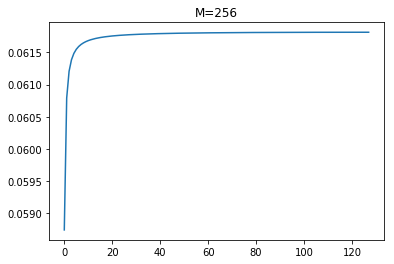

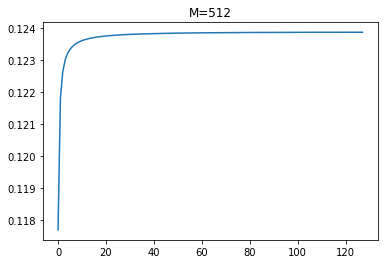

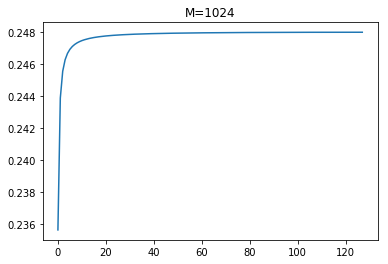

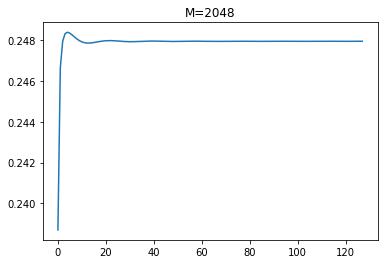

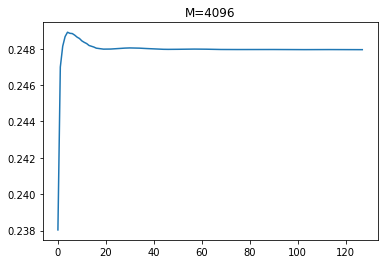

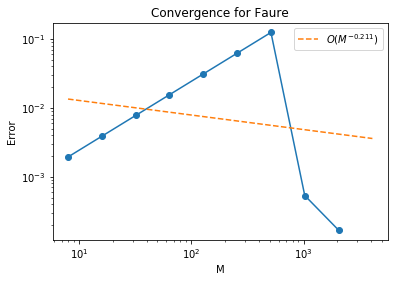

../configs/brownian_sobol/brownian.xml


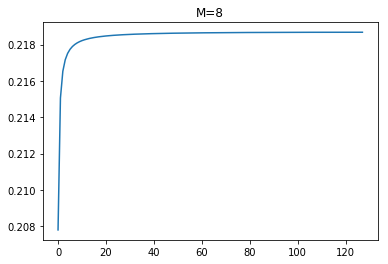

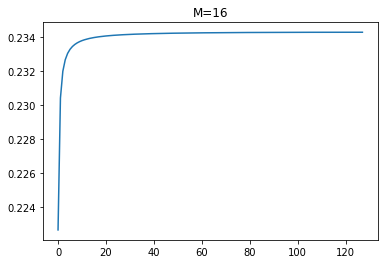

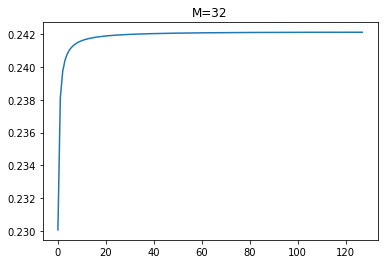

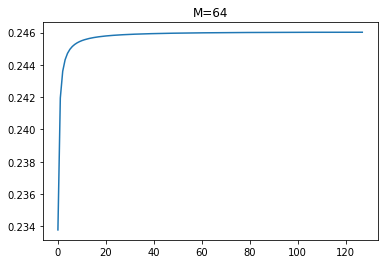

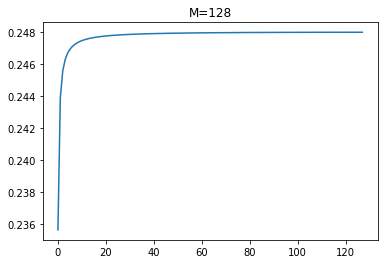

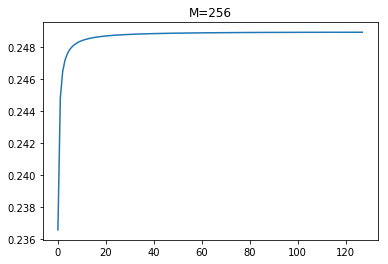

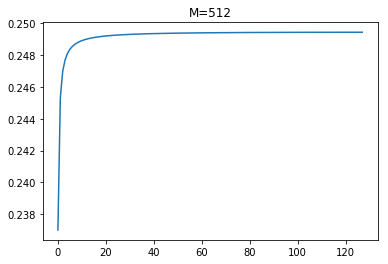

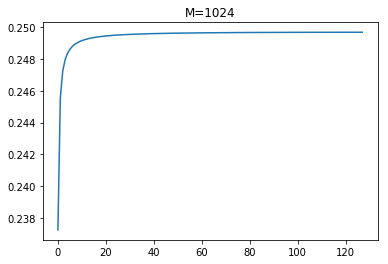

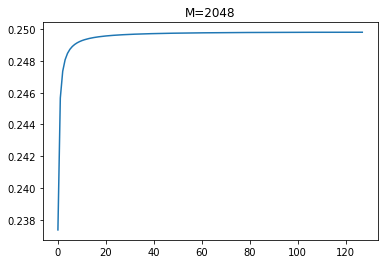

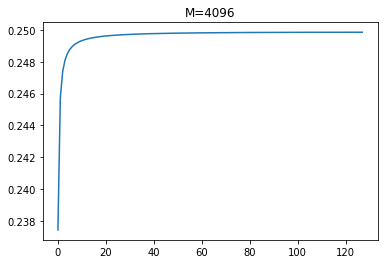

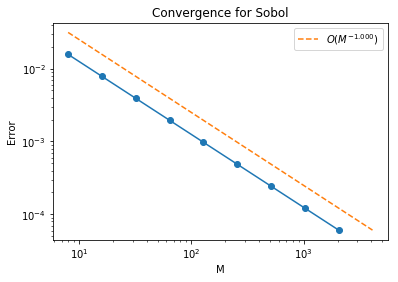

../configs/brownian_latin_center/brownian.xml


Error running alsvinncli.

 The command used was

	/home/kjetil/projects/alsvinn/build/alsuqcli/alsuqcli test.xml

The output was:

----------------
b'omp max threads= 8
'
----------------

The error output was:

----------------
b'
I4_UNIFORM - Fatal error!
  Input value of SEED = 0.
'

----------------

Also check the log files 'alsvinncli_mpi_log_<n>.txt'
../configs/brownian_halton/brownian.xml


Error running alsvinncli.

 The command used was

	/home/kjetil/projects/alsvinn/build/alsuqcli/alsuqcli test.xml

The output was:

----------------
b'omp max threads= 8
'
----------------

The error output was:

----------------
b'Error occured in rank 0
boost::dll::shared_library::get() failed (dlerror system message: ./libhalton.so: undefined symbol: halton_create): Illegal seek
'

----------------

Also check the log files 'alsvinncli_mpi_log_<n>.txt'
../configs/brownian_template/brownian.xml


Error running alsvinncli.

 The command used was

	/home/kjetil/projects/alsvinn/build/alsuqcli/alsuqcli test.xml

The output was:

----------------
b'omp max threads= 8
'
----------------

The error output was:

----------------
b'Error occured in rank 0
boost::dll::shared_library::load() failed (dlerror system message: ./libGENERATOR.so: cannot open shared object file: No such file or directory): Bad file descriptor
'

----------------

Also check the log files 'alsvinncli_mpi_log_<n>.txt'


In [17]:
import glob

for basename in glob.glob("../configs/brownian_*"):
    computeConvergence(basename + "/brownian.xml")

In [ ]:
import glob

for basename in glob.glob("../configs/brownian_*"):
    computeConvergence(basename + "/brownian.xml", True)